# Feature Engineering

Sometimes the features you have available in your initial data have little predictive strength when used in the most straightforward way.  This might be true almost regardless of choice of model class and hyperparameters.  And yet it might also be true that there are synthetic features latent in the data that are highly predictive, but that have to be *engineered* (mechanically, rather than sample-wise modification) to produce powerful features.

At the same time, a highly dimension model—whether of high dimension because of the initial data collection or because of creation of extra synthetic features—may lend itself less well to modeling techniques.  In these cases, it can be more computationally tractable, as well as more predictive, to work with a subset of all available features.

In [1]:
# Some libraries tend to be in flux for their dependency versions
import warnings
warnings.simplefilter("ignore")

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split

linf = pd.read_csv('linear_failure.csv', index_col=0)
%matplotlib inline

# A synthetic example

Let us look at an artificial example where the raw features of a dataset are of absolutely no value, but it is possible to derive good predictions by creating syntheric features out of them.  Obviously, real world data will not be as neat as that, but it is useful to express the concept.

At first brush the loaded data seems fairly noisy without an obvious pattern.

In [2]:
linf.head()

feature_1  feature_2    TARGET
0   0.162275  -0.282523 -0.045846
1  -0.874404  -0.164955  0.144237
2   0.000540   0.751708  0.000406
3   0.721775  -0.246271 -0.177752
4   0.374113   0.283637  0.106112

In [3]:
# The features seem uncorrelated, and no univariate correlation with target
linf.corr()

feature_1  feature_2    TARGET
feature_1   1.000000  -0.006995  0.033990
feature_2  -0.006995   1.000000 -0.031077
TARGET      0.033990  -0.031077  1.000000

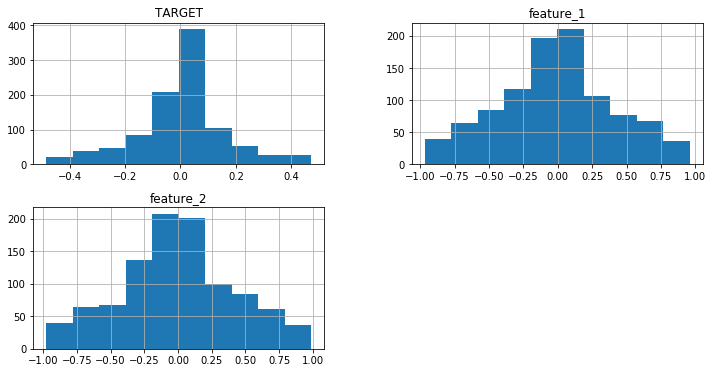

In [4]:
# Distribution of features and target looks roughly Gaussian
linf.hist(figsize=(12,6));

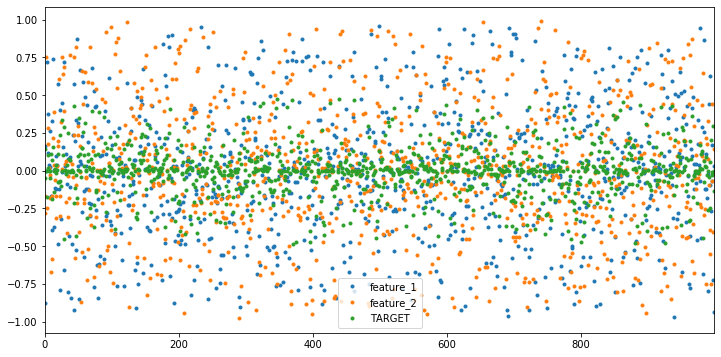

In [5]:
# No obvious trends in the data as sequences
%matplotlib inline
linf.plot(figsize=(12,6), style='.');

We might hope to identify a relationship between features and target using a linear regression such as this:

In [6]:
from sklearn.linear_model import LinearRegression

X = linf.drop('TARGET', axis=1)
y = linf['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

-0.019822672579967948

Slightly different linear models do equally poorly in detecting any relationship between the features and the target.  Notice that the metric used here is $R^2$ score rather than e.g. explained variance or mean absolute error (or others).


In [7]:
from sklearn.linear_model import Lasso, Ridge
lasso, ridge = Lasso(), Ridge()
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)

lasso.score(X_test, y_test), ridge.score(X_test, y_test)

(-0.0005807275057563288, -0.019630035291140047)

## Adding a feature

Let us try creating a new feature that is entirely based on existing features.

In [8]:
linf['f1xf2'] = linf.feature_1 * linf.feature_2
linf.head()

feature_1  feature_2    TARGET     f1xf2
0   0.162275  -0.282523 -0.045846 -0.045846
1  -0.874404  -0.164955  0.144237  0.144237
2   0.000540   0.751708  0.000406  0.000406
3   0.721775  -0.246271 -0.177752 -0.177752
4   0.374113   0.283637  0.106112  0.106112

In [9]:
X = linf.drop('TARGET', axis=1)
y = linf['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

1.0

The information we need was "latent" in the data the whole time, it just needed to be teased out.

In fairness, we can note that other regressors manage to derive the synthetic feature through their algorithmic structure.  But these regressors will have their own "blind spots" also, relative to different datasets.

In [10]:
X = linf.drop('TARGET', axis=1)
y = linf['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.999665968574619

In [12]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.9770295888967974